In [1]:
%matplotlib nbagg
#%load_ext line_profiler
#%load_ext memory_profiler

import jungfrau_utils as ju
import numpy as np
import json
import os, math
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors

import h5py
from ipyfilechooser import FileChooser

from alvra_tools import *
from alvra_tools.channels import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm, threshold
import glob

In [102]:
loadfiles = []
#for file in glob.glob('/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_low*'):
for file in glob.glob('/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA*'):
    loadfiles.append(file)
loadfiles = sorted(loadfiles, key = os.path.getmtime)
patch = loadfiles[:17]
patch

['/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_1_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_2_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_3_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_4_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_5_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_6_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_7_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_8_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_9_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_10_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_11_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_12_export.h5',
 '/sf/alvra/data/p18938/res/Claudio/Febpy_XES_tim

In [103]:
#Delay_mm = load_scan_readback('/sf/alvra/data/p18938/raw/scan_info/Febpy_XES_timescan_NOPA_loop_1.json')
#Delay_fs = (Delay_mm - 215.49872)*2/(3e8*1e3*1e-15)

roi1 = (7740, 7900, 220, 300) #signal 1
roi2 = (7740, 7900, 400, 480) #bkg 1

roi3 = (5080, 5220, 180, 280) #signal 2
roi4 = (5080, 5220, 300, 400) #bkg 2

all_files = 0
for fn in patch:
    print (fn)
    with h5py.File(fn, "r") as file2open:
        RIXS_pumped_roi1 = file2open['RIXS_pumped_roi1'][:]
        RIXS_unpumped_roi1 = file2open['RIXS_unpumped_roi1'][:]
        RIXS_transient_roi1 = file2open['RIXS_transient_roi1'][:]
        #RIXS_pumped_roi3 = file2open['RIXS_pumped_roi3'][:]
        #RIXS_unpumped_roi3 = file2open['RIXS_unpumped_roi3'][:]
        #RIXS_transient_roi3 = file2open['RIXS_transient_roi3'][:]
        #binNumber = file2open['binNumber']
        #Delay_fs = file2open['Delay_rebin'][:]
    
    all_files +=  RIXS_pumped_roi1

/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_1_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_2_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_3_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_4_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_5_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_6_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_7_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_8_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_9_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_10_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_11_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_12_export.h5
/sf/alvra/data/p18938/res/Claudio/Febpy_XES_timescan_NOPA_loop_13_export.h5
/sf/alvra/data/p18938

<IPython.core.display.Javascript object>


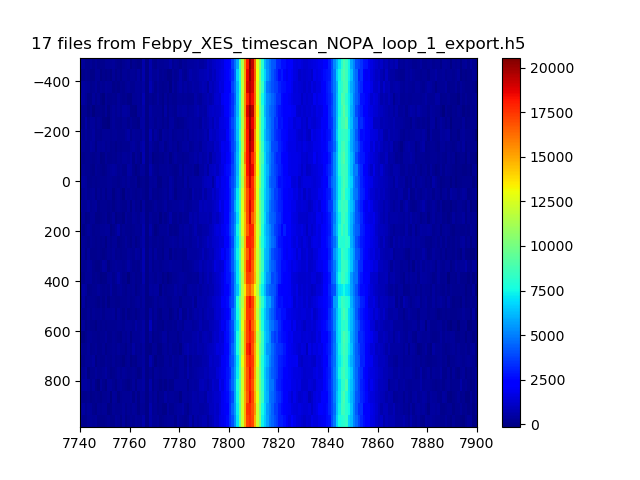

In [104]:
plt.figure()
plt.title('{} files from {}'.format(len(patch), patch[0].split('/')[-1]))
plt.imshow(all_files, aspect='auto', cmap = 'jet', extent=[roi1[0], roi1[1], Delay_fs[-1], Delay_fs[0]])
plt.colorbar()
plt.show()

In [106]:
print (all_files.sum()/253417.2222787663)

43.5296224179484


In [99]:
print (all_files.sum())

253417.2222787663


<IPython.core.display.Javascript object>


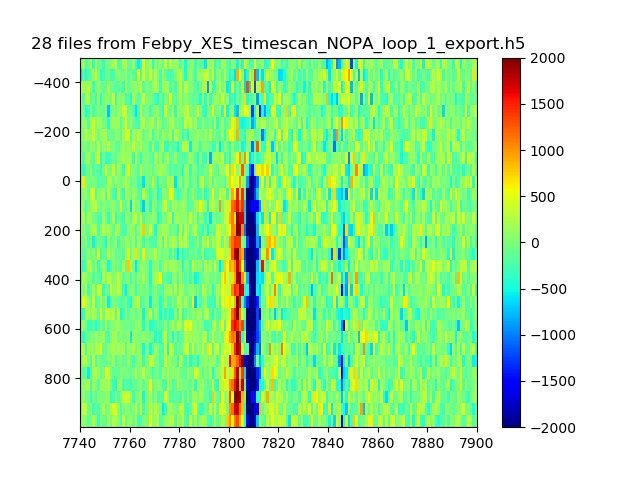

In [86]:
plt.figure()
plt.title('{} files from {}'.format(len(patch), patch[0].split('/')[-1]))
plt.imshow(all_files, aspect='auto', cmap = 'jet', extent=[roi1[0], roi1[1], Delay_fs[-1], Delay_fs[0]], vmax=2000, vmin=-2000)
plt.colorbar()
plt.show()

149

In [57]:
new_timeaxis = np.arange(-500, 1000, 50)
all_files2list = ([all_files[:,i] for i in range(all_files.shape[1])])

In [ ]:
newTransient, binEdges, binNumber = binned_statistic(Delays_corr, XES_transient_roi1_ON_tolist, statistic='mean', bins=new_timeaxis)
